In [1]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import binom_test
from scipy.stats import poisson
from scipy.stats import binom

In [6]:
data = pd.read_csv('train.csv')

In [24]:
ages = data['Age'].dropna()
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


Text(0, 0.5, 'Density')

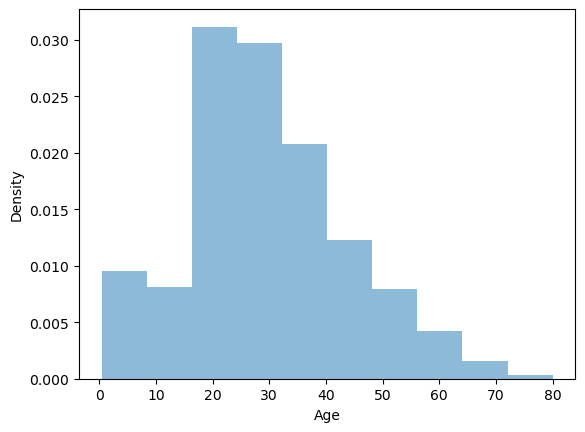

In [11]:
# Оцінка нормального розподілу
# Побудова графіку густини розподілу (density plot)
plt.hist(ages, density=True, alpha=0.5, label='Data')
plt.xlabel('Age')
plt.ylabel('Density')

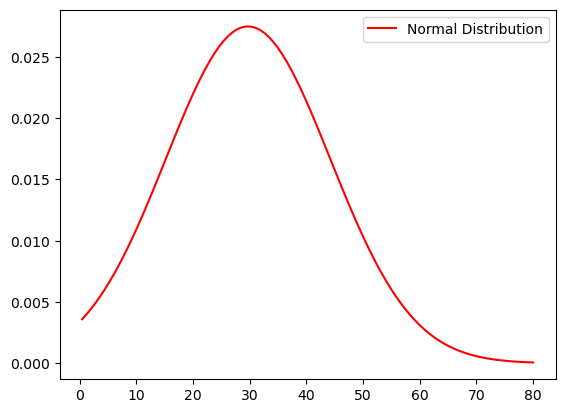

In [12]:
# Оцінка параметрів нормального розподілу
mu, std = norm.fit(ages)
x = np.linspace(ages.min(), ages.max(), 100)
pdf = norm.pdf(x, mu, std)
plt.plot(x, pdf, 'r-', label='Normal Distribution')

plt.legend()
plt.show()

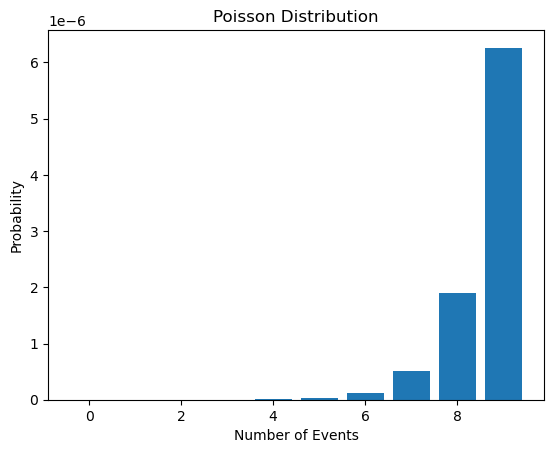

In [15]:
# Оцінка розподілу Пуассона
# Оцінка параметру розподілу Пуассона
lambda_param = ages.mean()

# Розрахунок ймовірностей розподілу Пуассона
x = np.arange(0, 10)
pmf = poisson.pmf(x, lambda_param)

plt.bar(x, pmf)
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title('Poisson Distribution')

plt.show()

In [16]:
# Оцінка біноміального розподілу
# Перевірка на біноміальний розподіл
p_value = binom_test(len(ages[ages == 1]), n=len(ages), p=0.5)

if p_value < 0.05:
    print("Age follows a binomial distribution.")
else:
    print("Age does not follow a binomial distribution.")

Age follows a binomial distribution.


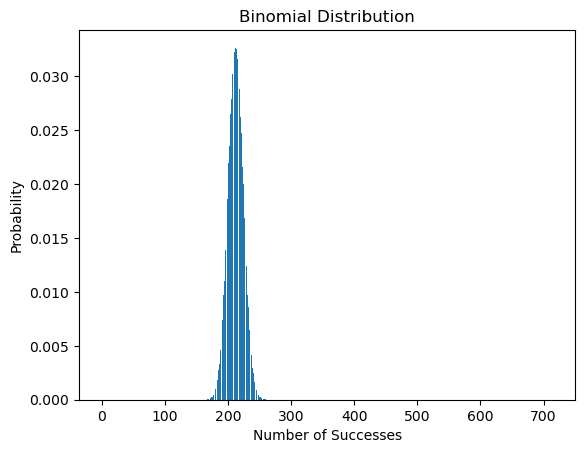

In [19]:
# Оцінка параметрів біноміального розподілу
n = len(ages)
p = ages.mean() / 100  # Припустимо, що значення віку виражені у відсотках

# Розрахунок ймовірностей біноміального розподілу
x = np.arange(0, n+1)
pmf = binom.pmf(x, n, p)

plt.bar(x, pmf)
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Distribution')

plt.show()

In [25]:
# Заміна пропущених значень середнім значенням
mean_age = data['Age'].mean()
data['Age'].fillna(mean_age, inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [ ]:
"""
Цей підхід підходить, якщо припущення, що значення віку розподілені нормально, є прийнятним. 
Заповнення середнім значенням може допомогти зберегти загальний розподіл віку без значного впливу на статистику.
"""